In [135]:
import numpy as np 
import matplotlib.pyplot as plt 

def initialise(dim):
    w1 = np.random.rand(dim)
    #w1.reshape(dim,1)
    w0 = np.random.rand()
    return w1, w0

In [136]:
def compute_cost(X, Y, y_hat):
    m = len(X)
    cost = (1/(2*m)) * np.sum(np.square(y_hat - Y))
    return cost

In [137]:
def predict_y(X, w1, w0):
    if len(w1)==1:
        y_hat = w1*X + w0
    else:
        y_hat = np.dot(X, w1) + w0
    return y_hat

In [138]:
def update_parameters(X, Y, y_hat, w1, w0, learning_rate):
    m = len(Y)
    db = (np.sum(y_hat - Y))/m
    dw = np.dot(X.T, (y_hat-Y))/m
    w1 = w1 - learning_rate*dw
    w0 = w0 - learning_rate*db
    return w1, w0

In [ ]:
def gradient_descent(X, y, alpha, max_iter, stopping_threshold= 1e-6):
    dims  = 1 
    if len(X.shape)> 1:
        dims = X.shape[1]
    w1, w0 = initialise(dims)
    previous_cost = None
    cost_history = np.zeros(max_iter)
    for itr in range(max_iter):
        y_hat = predict_y(X, w1, w0)
        cost = compute_cost(X, y, y_hat)
        if previous_cost and abs(previous_cost-cost) <= stopping_threshold:
            break
        cost_history[itr] = cost
        previous_cost = cost
        old_w1 = w1
        old_w0 = w0
        w1, w0=update_parameters(X,y, y_hat, old_w1, old_w0, alpha)

    return w0, w1, cost_history


In [140]:
X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
  55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
  45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
  48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
  78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
  55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
  60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

In [141]:
learning_rate = 0.0001
iterations = 10
print(X.shape, Y.shape)

w0, w1, cost_history = gradient_descent(X, Y, learning_rate, iterations)
print(w0, w1)

(20,) (20,)
0.1917662902330293 [1.32768867]


In [142]:
cost_history

array([1678.26457389,  951.96004199,  549.4970903 ,  326.48261031,
        202.90487951,  134.42746245,   96.48246523,   75.45622216,
         63.80507098,   57.34888554])

Text(0, 0.5, 'Cost history')

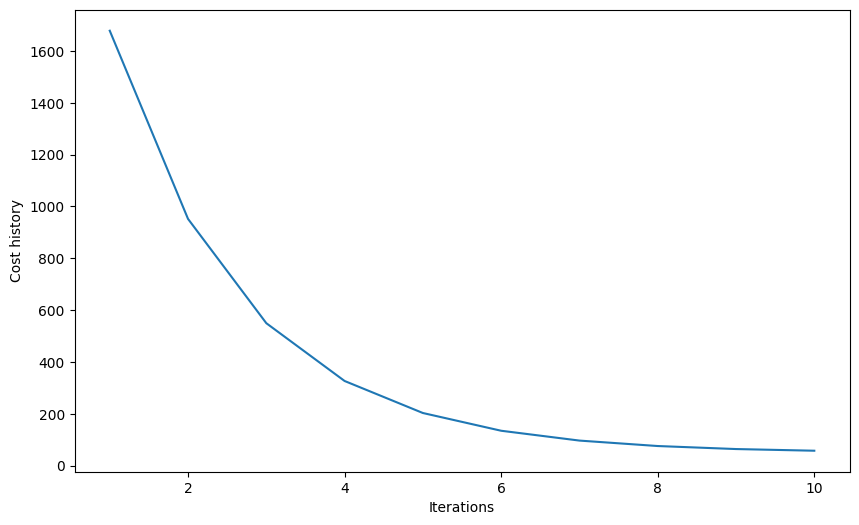

In [143]:
x=range(1,iterations+1)
y = cost_history
plt.plot(x,y)
plt.xlabel("Iterations")
plt.ylabel("Cost history")

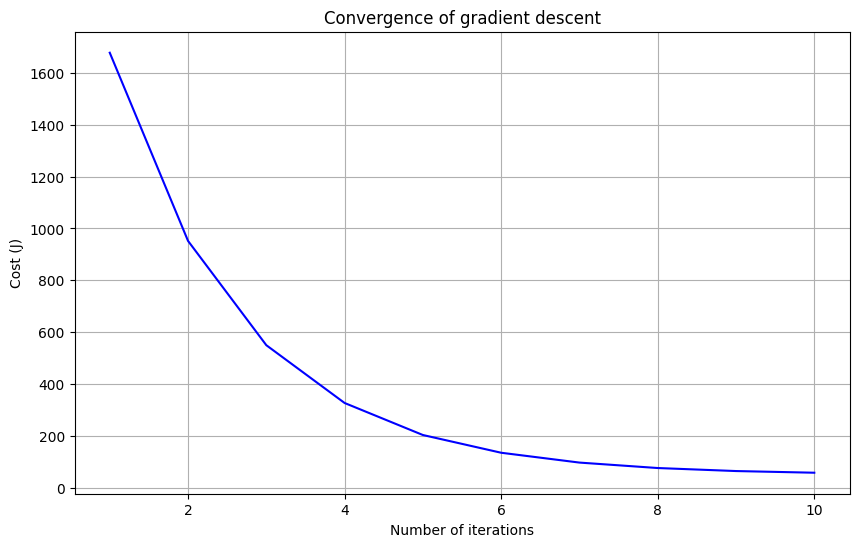

In [144]:
import numpy as np
import matplotlib.pyplot as plt
# Plot the cost history
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()

In [145]:
X = 10 * np.random.rand(2)
X

array([6.6864322 , 9.29375989])

In [146]:
learning_rate = 0.0001
iterations= 1000

np.random.seed(42)

m = 200

X = 10 * np.random.rand(m,2)

true_weight= np.array([3,4])
bias = 2
Y = X.dot(true_weight) + bias + np.random.randn(m)

w0, w1, cost_history = gradient_descent(X, Y, learning_rate, iterations)
print(w0,w1)

1.282428874489976 [3.30894284 3.787046  ]


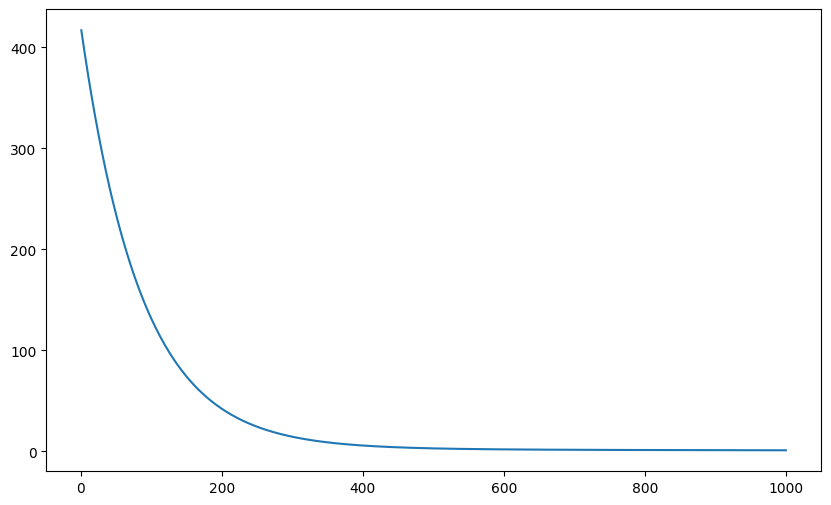

In [148]:
plt.plot(range(1,iterations+1), cost_history)